In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [70]:
pd.options.display.float_format = '{:.2f}'.format

In [71]:
raw_data_path = os.path.join(os.path.dirname(os.getcwd()), 'data', 'raw')
figures_path = os.path.join(os.path.dirname(os.getcwd()), 'figures')

In [72]:
df_FUNO11 = pd.read_csv(os.path.join(raw_data_path, 'FUNO11.csv'))

In [73]:
df_FUNO11['Fecha'] = pd.to_datetime(df_FUNO11['Fecha'], format='%Y/%m/%d')
df_FUNO11.set_index('Fecha', inplace=True)
df_FUNO11.head()

,Precio,Importe
Fecha,,
2011-03-18,17.13,9225887.90
2011-03-22,16.92,8678341.18
2011-03-23,16.63,32832212.50
2011-03-24,16.64,12175114.00
2011-03-25,16.69,868056.00


In [74]:
df_FUNO11.describe()

,Precio,Importe
count,3428.00,3428.00
mean,27.70,192733886.39
std,6.50,260028835.13
min,15.30,0.00
25%,22.57,78477560.82
50%,26.81,139359829.46
75%,33.23,234140381.24
max,42.36,6689162375.46


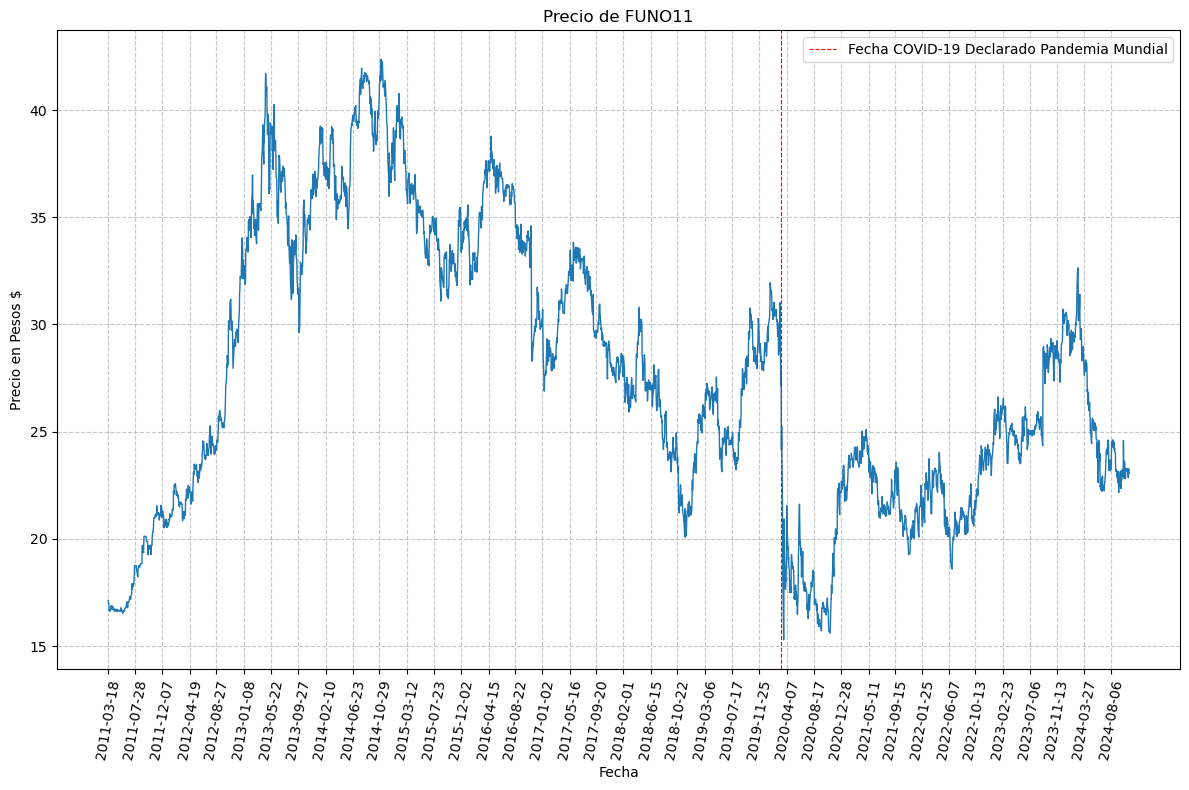

In [75]:
fig = plt.figure(figsize=(12, 8))

sns.lineplot(x=df_FUNO11.index, y='Precio', data=df_FUNO11, linewidth=1)
plt.title('Precio de FUNO11')

fecha_covid = pd.to_datetime('2020-03-11')
plt.axvline(x=fecha_covid, color='r', linestyle='--', label='Fecha COVID-19 Declarado Pandemia Mundial', linewidth=0.8)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=df_FUNO11.index[::91], rotation=80)
plt.ylabel('Precio en Pesos $')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'Precios_FUNO11.png'))
plt.show()

In [76]:
def millones(x, pos):
    return f'${x * 1e-6:,.0f}M'

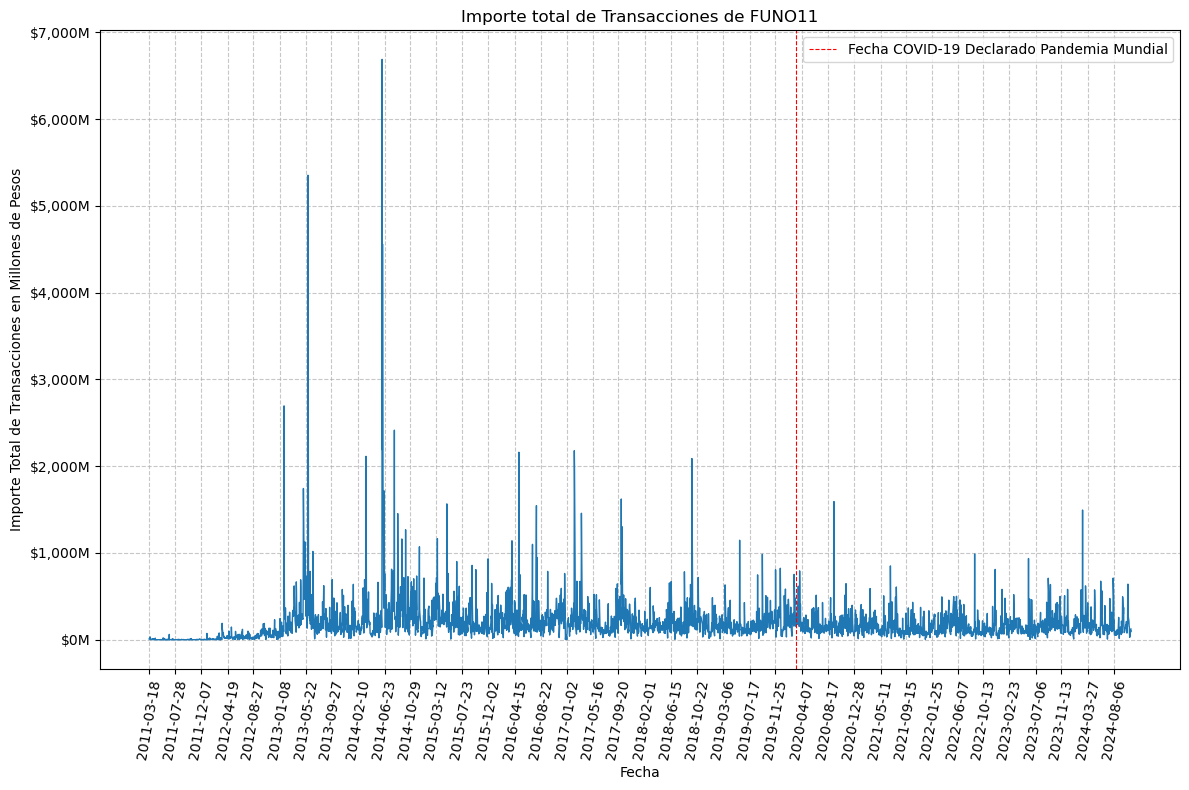

In [77]:
fig = plt.figure(figsize=(12, 8))

sns.lineplot(x=df_FUNO11.index, y='Importe', data=df_FUNO11, linewidth=1)
plt.title('Importe total de Transacciones de FUNO11')

plt.axvline(x=fecha_covid, color='r', linestyle='--', label='Fecha COVID-19 Declarado Pandemia Mundial', linewidth=0.8)

plt.gca().yaxis.set_major_formatter(FuncFormatter(millones))

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(ticks=df_FUNO11.index[::91], rotation=80)
plt.ylabel('Importe Total de Transacciones en Millones de Pesos')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'Importes_FUNO11.png'))
plt.show()


In [78]:
df_FUNO11[df_FUNO11['Importe']>2_000_000_000]

,Precio,Importe
Fecha,,
2013-01-30,34.80,2695205233.63
2013-05-31,38.83,5353256833.15
2014-03-21,37.37,2113705650.64
2014-06-11,38.19,6689162375.46
2014-06-12,38.45,2188048000.37
2014-06-13,39.04,4560502382.43
2014-08-12,41.35,2415466466.14
2016-05-04,37.62,2160920660.30
2017-02-09,28.89,2178807554.16


In [79]:
archivos_FIBRAs = ['FIBRAPL14.csv', 'FIBRAMQ12.csv', 'TERRA13.csv', 'DANHOS13.csv', 'FMTY14.csv', 'FIHO12.csv']

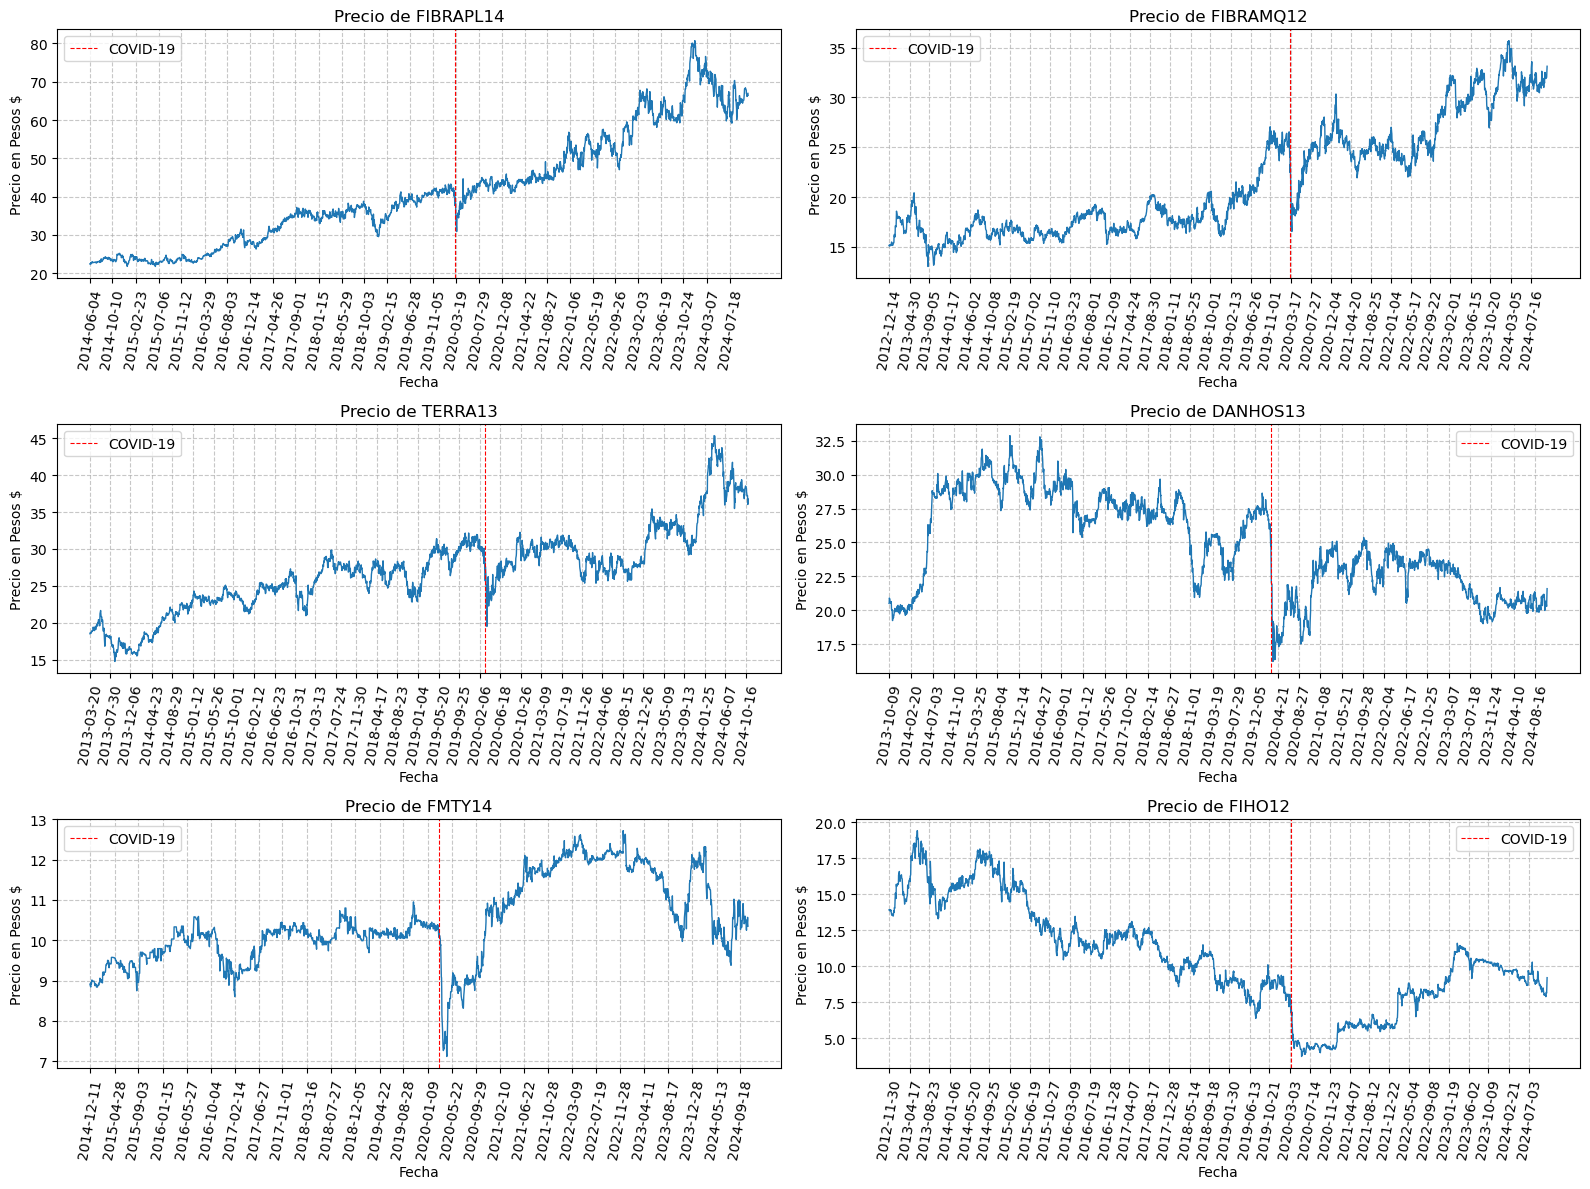

In [80]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
ax = ax.ravel()

for i, archivo in enumerate(archivos_FIBRAs):
    df = pd.read_csv(os.path.join(raw_data_path, archivo))
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y/%m/%d')
    df.set_index('Fecha', inplace=True)
    sns.lineplot(x=df.index, y='Precio', data=df, linewidth=1, ax=ax[i])
    ax[i].set_title(f'Precio de {archivo[:-4]}')
    ax[i].grid(True, linestyle='--', alpha=0.7)
    ax[i].axvline(x=fecha_covid, color='r', linestyle='--', label='COVID-19', linewidth=0.8)
    ax[i].set_ylabel('Precio en Pesos $')
    ax[i].set_xticks(ticks=df.index[::91])
    ax[i].tick_params(axis='x', rotation=80)
    ax[i].legend()
    
plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'Precios_FIBRAs.png'))
plt.show()

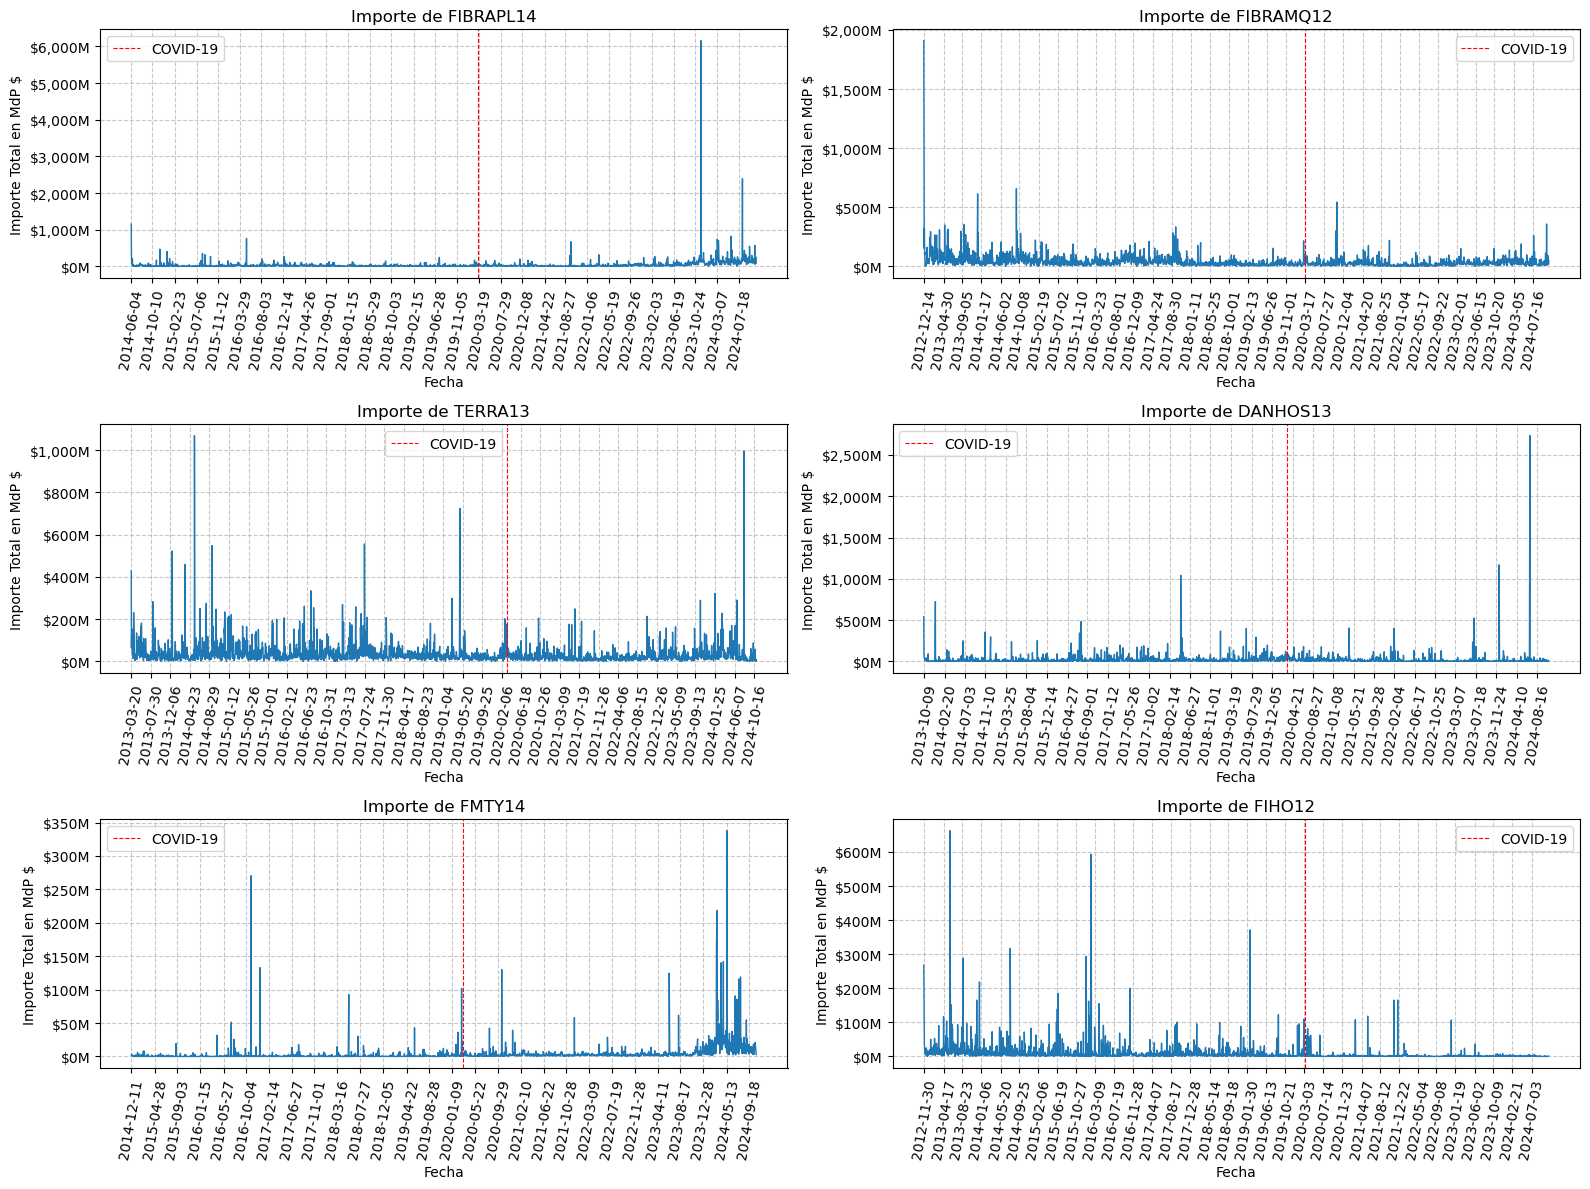

In [81]:
# graficar el importe
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
ax = ax.ravel()

for i, archivo in enumerate(archivos_FIBRAs):
    df = pd.read_csv(os.path.join(raw_data_path, archivo))
    df['Fecha'] = pd.to_datetime(df['Fecha'], format='%Y/%m/%d')
    df.set_index('Fecha', inplace=True)
    sns.lineplot(x=df.index, y='Importe', data=df, linewidth=1, ax=ax[i])
    ax[i].yaxis.set_major_formatter(FuncFormatter(millones))
    ax[i].set_title(f'Importe de {archivo[:-4]}')
    ax[i].grid(True, linestyle='--', alpha=0.7)
    ax[i].axvline(x=fecha_covid, color='r', linestyle='--', label='COVID-19', linewidth=0.8)
    ax[i].set_ylabel('Importe Total en MdP $')
    ax[i].set_xticks(ticks=df.index[::91])
    ax[i].tick_params(axis='x', rotation=80)
    ax[i].legend()

plt.tight_layout()

plt.savefig(os.path.join(figures_path, 'Importes_FIBRAs.png'))
plt.show()